추천 시스템 입문(Recommender Ssystem) 책에서 제공되는 예제 코드입니다.

# Movielens 데이터 다운로드

In [ ]:
# MovieLens의 데이터셋을 data 디렉터리에 다운로드 한 뒤 압축을 푼다
!wget -nc --no-check-certificate https://files.grouplens.org/datasets/movielens/ml-10m.zip -P ../data
!unzip -n ../data/ml-10m.zip -d ../data/

# Movielens 데이터 확인

In [2]:
import pandas as pd

In [3]:
# 영화정보 로딩(10681작품)
# movieID와 제목만 사용
m_cols = ['movie_id', 'title', 'genre']
movies = pd.read_csv('../data/ml-10M100K/movies.dat', names=m_cols, sep='::' , encoding='latin-1', engine='python')

# genre를 list 형식으로 저장한다
movies['genre'] = movies.genre.apply(lambda x:x.split('|'))
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [4]:
# 사용자 부여한 영화의 태그 정보 로딩
t_cols = ['user_id', 'movie_id', 'tag', 'timestamp']
user_tagged_movies = pd.read_csv('../data/ml-10M100K/tags.dat', names=t_cols, sep='::', engine='python')

# tag를 소문자로 한다
user_tagged_movies['tag'] = user_tagged_movies['tag'].str.lower()

user_tagged_movies.head()

,user_id,movie_id,tag,timestamp
0,15,4973,excellent!,1215184630
1,20,1747,politics,1188263867
2,20,1747,satire,1188263867
3,20,2424,chick flick 212,1188263835
4,20,2424,hanks,1188263835


In [5]:
print(f'태그 종류={len(user_tagged_movies.tag.unique())}')
print(f'태그 레코드 수={len(user_tagged_movies)}')
print(f'태그가 붙어있는 영화 수={len(user_tagged_movies.movie_id.unique())}')

태그 종류=15241
태그 레코드 수=95580
태그가 붙어있는 영화 수=7601


In [6]:
# tag를 영화별로 list 형식으로 저장한다
movie_tags = user_tagged_movies.groupby('movie_id').agg({'tag':list})

# 내그 정보를 결합한다
movies = movies.merge(movie_tags, on='movie_id', how='left')

movies.head()

,movie_id,title,genre,tag
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]","[pixar, pixar, pixar, animation, pixar, animat..."
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]","[for children, game, animals, joe johnston, ro..."
2,3,Grumpier Old Men (1995),"[Comedy, Romance]","[funniest movies, comedinha de velhinhos engra..."
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",[girl movie]
4,5,Father of the Bride Part II (1995),[Comedy],"[steve martin, pregnancy, remake, steve martin..."


In [7]:
# 평갓값 데이터 로딩
r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('../data/ml-10M100K/ratings.dat', names=r_cols, sep='::', engine='python')
ratings.head()


,user_id,movie_id,rating,timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392


In [8]:
# 데이터량이 많으므로 사용자 수를 1000명으로 줄여서 시험한다
valid_user_ids = sorted(ratings.user_id.unique())[:1000]
ratings = ratings[ratings["user_id"].isin(valid_user_ids)]
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392


In [9]:
# 영화 데이터와 평가 데이터를 결합한다
movielens = ratings.merge(movies, on='movie_id')
movielens.head()

,user_id,movie_id,rating,timestamp,title,genre,tag
0,1,122,5.0,838985046,Boomerang (1992),"[Comedy, Romance]","[dating, nudity (topless - brief), can't remem..."
1,1,185,5.0,838983525,"Net, The (1995)","[Action, Crime, Thriller]","[computers, computers, internet, irwin winkler..."
2,1,231,5.0,838983392,Dumb & Dumber (1994),[Comedy],"[jeff daniels, jim carrey, stupid, jim carrey,..."
3,1,292,5.0,838983421,Outbreak (1995),"[Action, Drama, Sci-Fi, Thriller]","[biology, gross, disease, futuristmovies.com, ..."
4,1,316,5.0,838983392,Stargate (1994),"[Action, Adventure, Sci-Fi]","[egypt, space, time travel, time travel, alien..."


In [10]:
print(f'unique_users={len(movielens.user_id.unique())}, unique_movies={len(movielens.movie_id.unique())}')

unique_users=1000, unique_movies=6736


In [ ]:
import numpy as np
# 사용자 정보
movielens.groupby('user_id').agg({'movie_id': len}).agg({'movie_id':[min, max, np.mean, len]})

In [ ]:
# 영화 정보
movielens.groupby('movie_id').agg({'user_id': len}).agg({'user_id':[min, max, np.mean, len]})

In [18]:
print(f'평갓값 수={len(movielens)}')

평갓값 수=132830


In [19]:
movielens.groupby('rating').agg({'movie_id': len})

,movie_id
rating,
0.5,851
1.0,4847
1.5,1247
2.0,10292
2.5,3729
3.0,31706
3.5,9661
4.0,39917
4.5,6949


<Axes: xlabel='rating'>

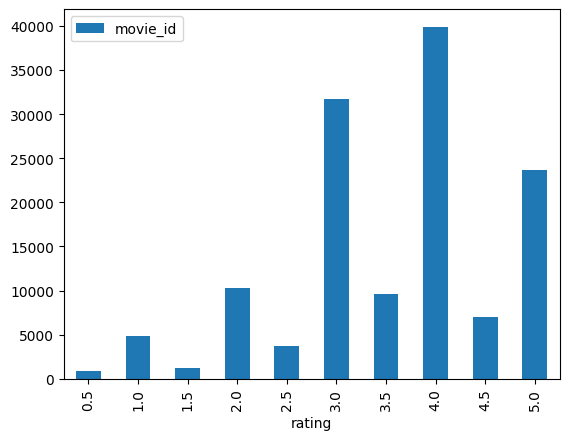

In [21]:
movielens.groupby('rating').agg({'movie_id': len}).plot.bar()

# 데이터 분할

In [22]:
# 학습용과 테스트용으로 데이터를 분할한다
# 각 사용자의 직전 5건의 영화를 평가용으로 사용하고, 그 이외는 학습용으로 한다
# 먼저, 각 사용자가 평가한 영화의 순서를 계산한다
# 직전에 부여한 영화부터 순번을 부여한다(1부터 시작)

movielens['timestamp_rank'] = movielens.groupby(
    'user_id')['timestamp'].rank(ascending=False, method='first')
movielens_train = movielens[movielens['timestamp_rank'] > 5]
movielens_test = movielens[movielens['timestamp_rank']<= 5]